# Disease Prediction using Machine Learning

# Project Objective
![Alt text](https://itdesigners.org/wp-content/uploads/2024/02/heart-1024x576.jpg)
Heart Disease Prediction using Machine Learning
Heart disease prevention is critical, and data-driven prediction systems can significantly aid in early diagnosis and treatment. Machine Learning offers accurate prediction capabilities, enhancing healthcare outcomes.
In this project, I analyzed a heart disease dataset with appropriate preprocessing. Multiple classification algorithms were implemented in Python using Scikit-learn and Keras to predict the presence of heart disease.

**Algorithms Used**:
- Logistic Regression
- Naive Bayes
- Support Vector Machine (Linear)
- K-Nearest Neighbors
- Decision Tree
- Random Forest
- XGBoost
- Artificial Neural Network (1 Hidden Layer, Keras)

In [ ]:
#Multiple model test: best model save(Best Score) 


# Step 1: Import Import Modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Step2: Loading Data

In [ ]:
url = '''https://github.com/ankitmisk/Heart_Disease_Prediction_ML_Model/blob/main/heart.csv?raw=true'''
df = pd.read_csv(url)
print('Done')

Done


# Step 3: Understanding Data using EDA

In [ ]:
#3.1 data head
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#3.2 data tail
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
# 3.4data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
#3.5 data columns
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

###### 3.6 Column Description
- *age*:			`age`
- *sex*:			`1: male, 0: female`
- *cp*:			`chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic`
- *trestbps*:			`resting blood pressure`
- *chol*:			`` serum cholestoral in mg/dl``
- *fbs*:			`fasting blood sugar > 120 mg/dl`
- *restecg*:			`resting electrocardiographic results (values 0,1,2)`
- *thalach*:			 `maximum heart rate achieved`
- *exang*:			`exercise induced angina`
- *oldpeak*:			`oldpeak = ST depression induced by exercise relative to rest`
- *slope*:			`the slope of the peak exercise ST segment`
- *ca*:			`number of major vessels (0-3) colored by flourosopy`
- *thal*:			`thal: 3 = normal; 6 = fixed defect; 7 = reversable defect`

In [ ]:
# Domain Knowledge is required for this level of project

In [ ]:
df.isna().sum()
# No null values found
# in case of null:remove, fill, replace, drop

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

##### 3.8  column analysis

In [ ]:
df.describe().round(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


##### 3.9 column univariate analysis 

In [ ]:
for i in df:
    print(f'Column_{i}',df[i].unique())
    print('==================',end = '\n\n')

Column_age [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]

Column_sex [1 0]

Column_cp [3 2 1 0]

Column_trestbps [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]

Column_chol [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 3

##### 3.10 Each Numerical Features Hist Plot distribution

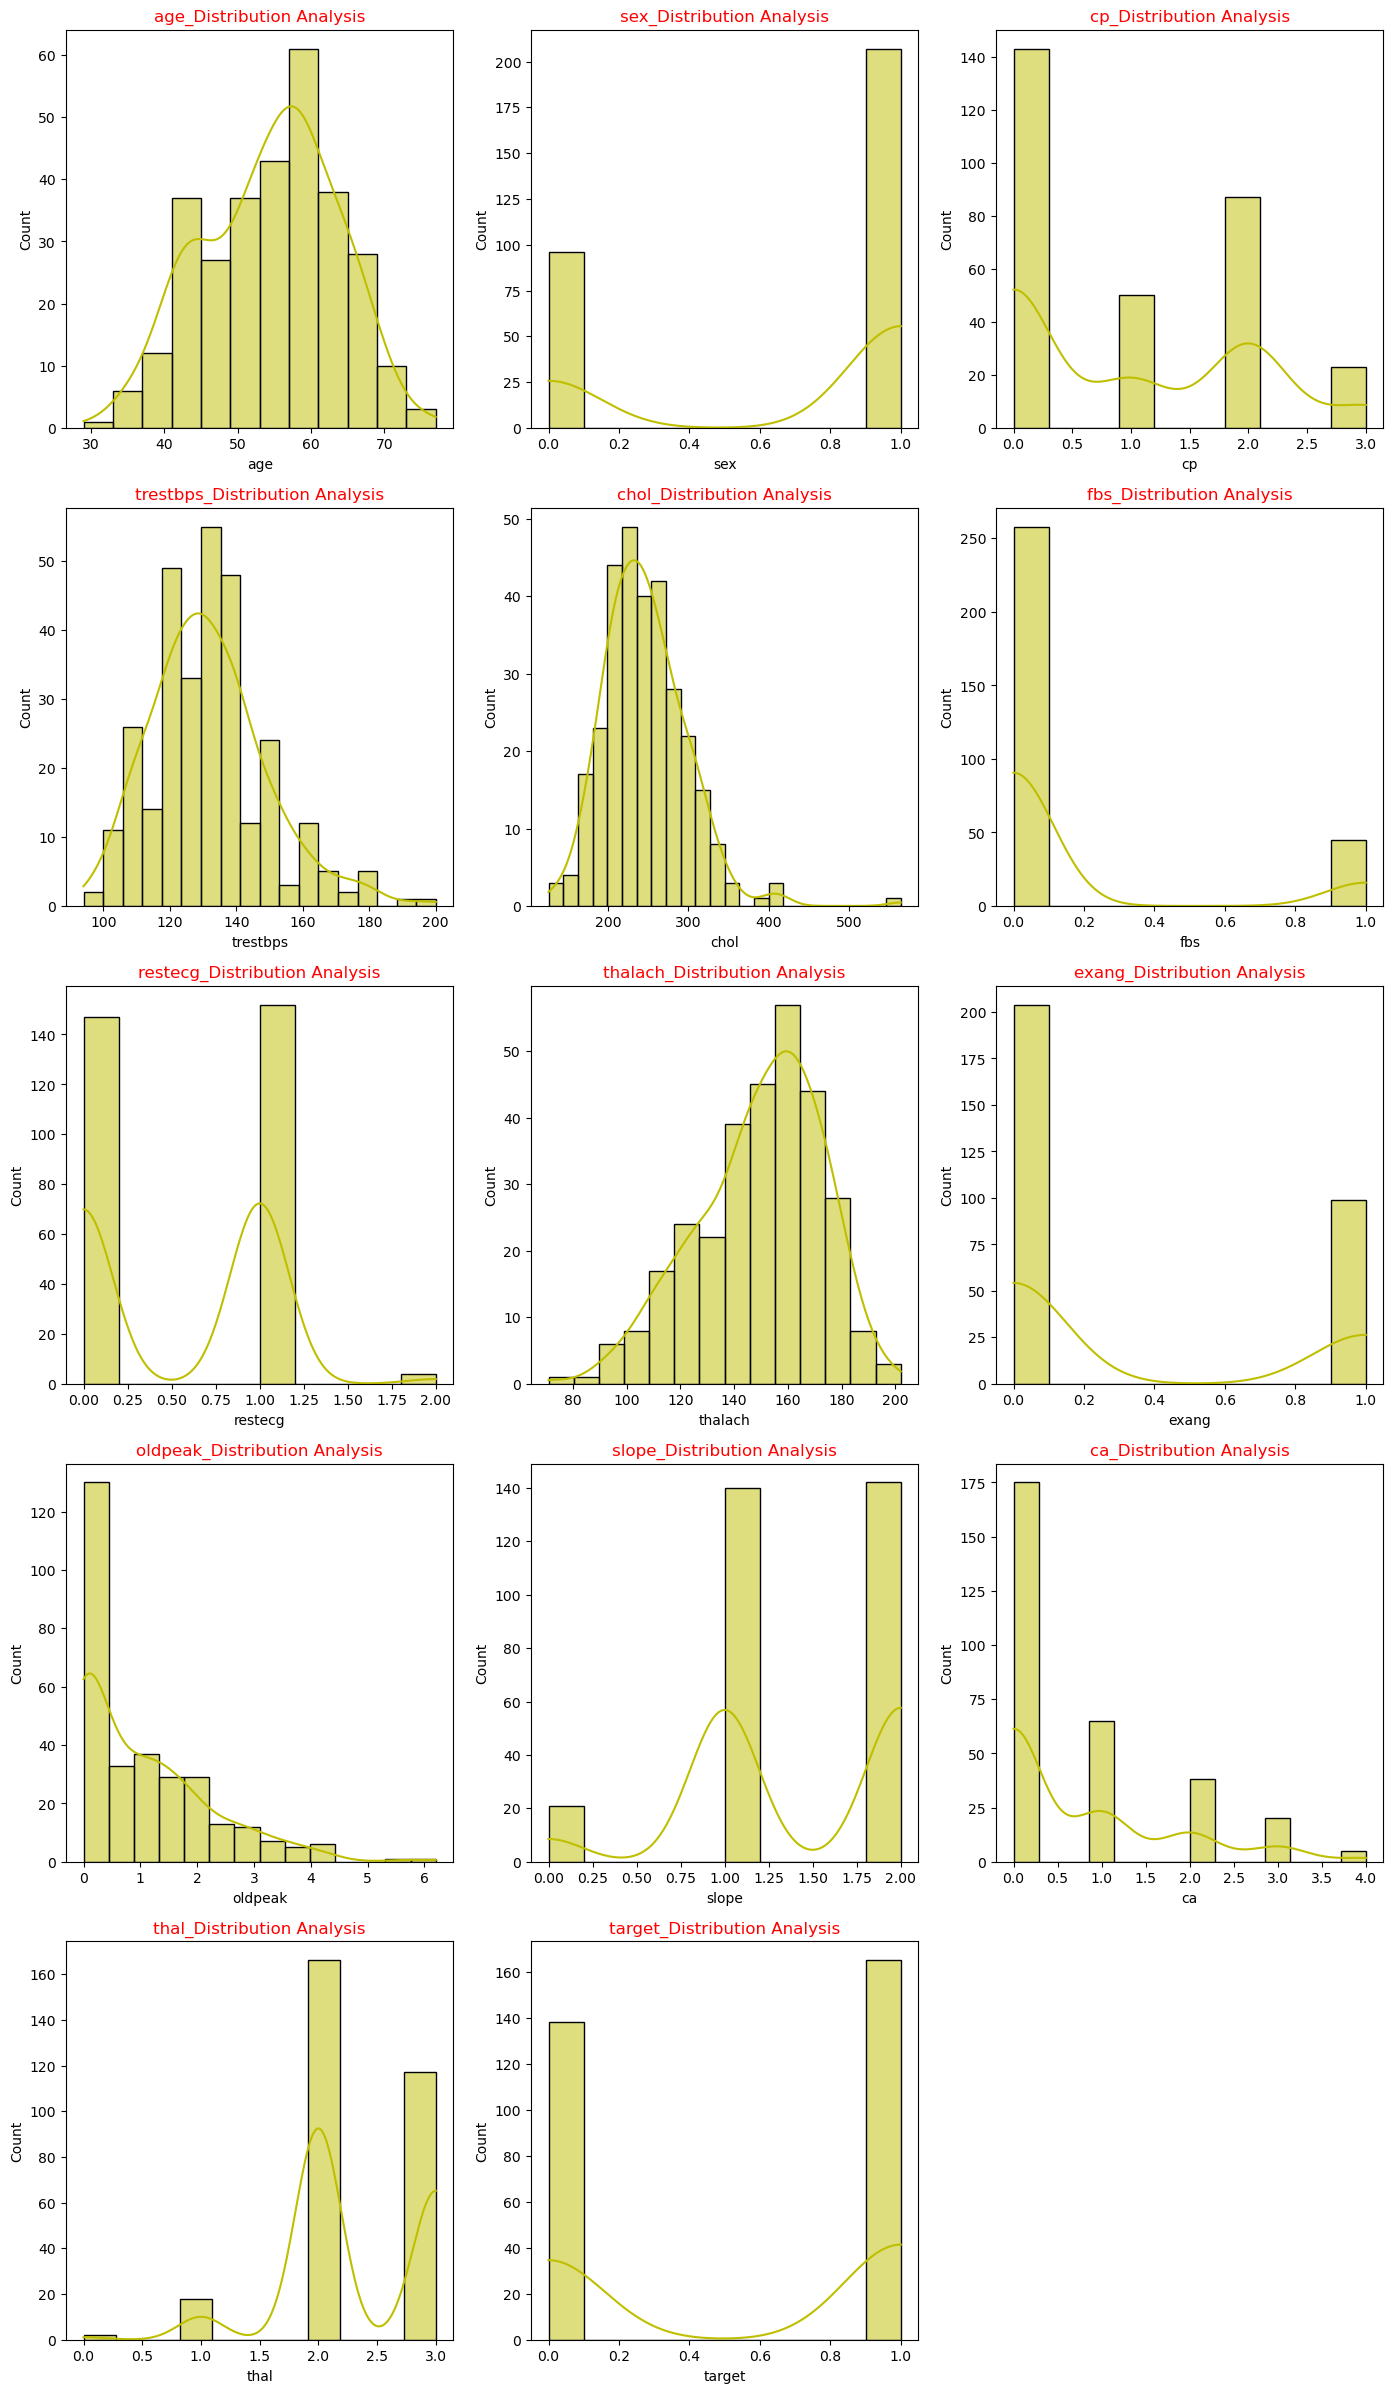

In [ ]:
r=5
c=3
plt.figure(figsize=(17,30))
for i,j in enumerate(df):
    plt.subplot(r,c,i+1)
    plt.title(f'{j}_Distribution Analysis',color='r')
    sns.histplot(df[j],kde=True,color='y')
plt.savefig('All_numerical_features.jpeg',dpi=500)
plt.show()


In [ ]:
# Target col not that much imbalance, we can proceed, if imbalance found we need to balance using sampling

##### 3.11 Bivariate Analysis,To check Correlation of features vs target

<Axes: >

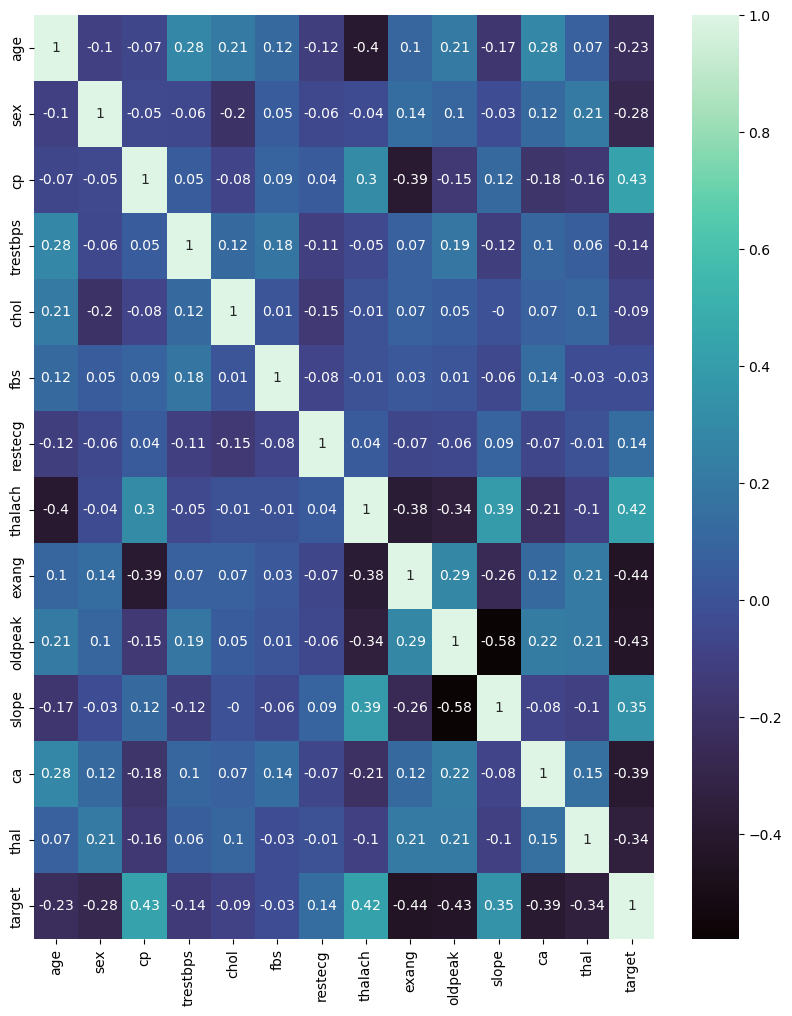

In [ ]:
plt.figure(figsize=(10,12))
sns.heatmap(df.corr().round(2),cmap='mako',annot=True)

In [ ]:
# "thalach" refers to the maximum heart rate achieved during exercise, specifically measured in beats per minute (bpm)
# Fasting blood sugar (FBS) levels, when elevated, can indicate an increased risk of heart disease
# "slope" usually refers to the ST/HR slope, which is a measurement derived from an exercise stress test used to assess the severity of coronary artery disease

In [ ]:
df.corr()['target'].sort_values(ascending=False).reset_index()

,index,target
0,target,1.000000
1,cp,0.433798
2,thalach,0.421741
3,slope,0.345877
4,restecg,0.137230
5,fbs,-0.028046
6,chol,-0.085239
7,trestbps,-0.144931
8,age,-0.225439
9,sex,-0.280937


In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

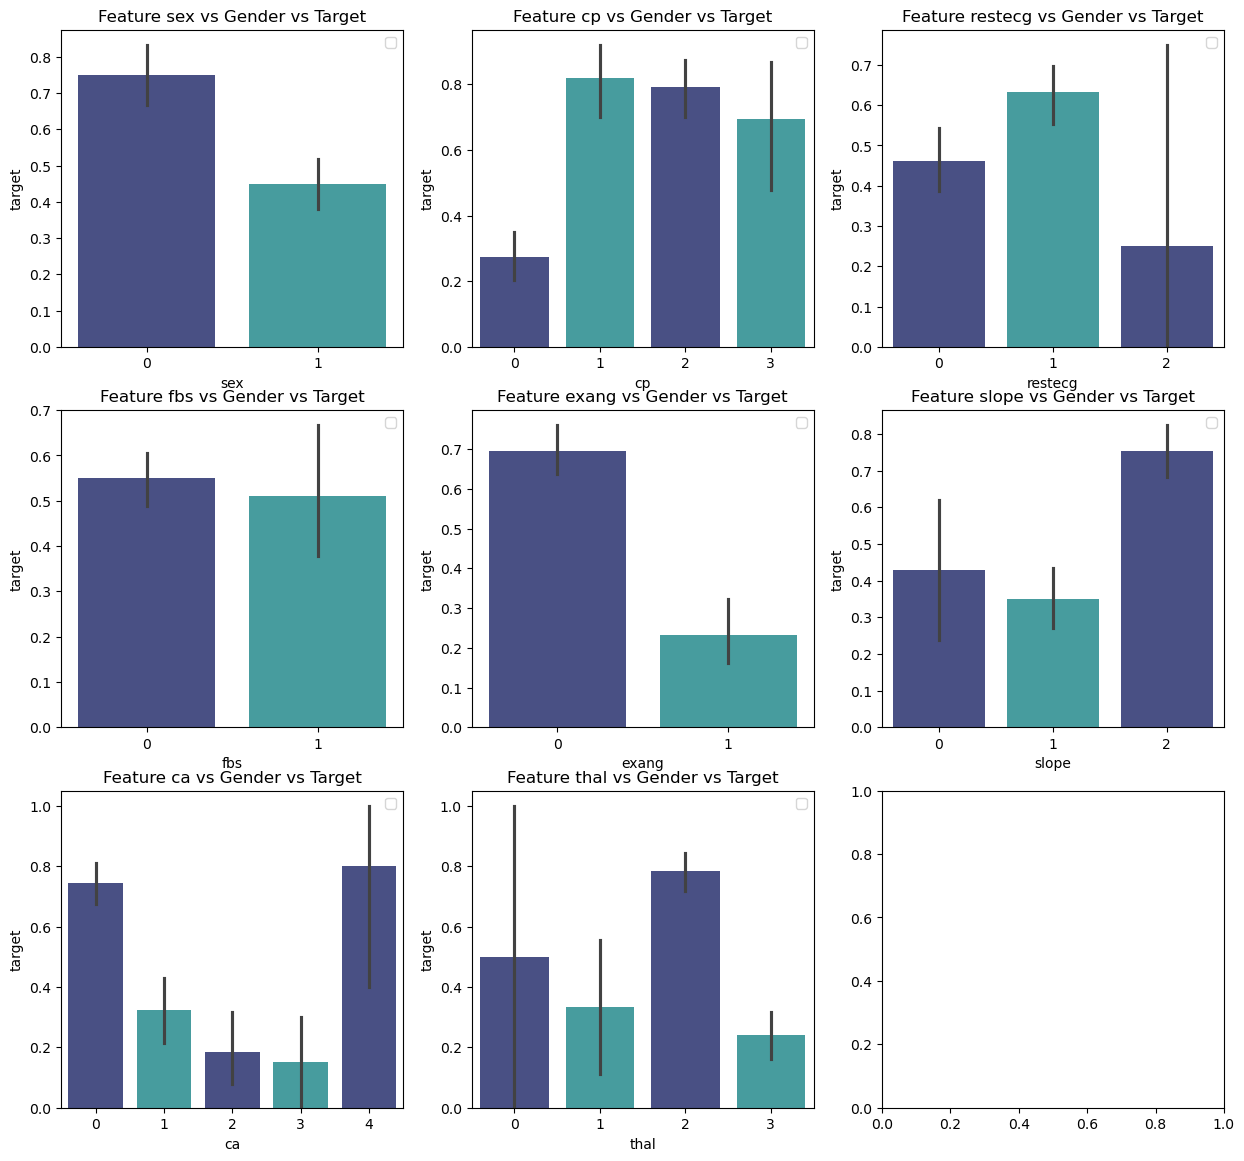

In [ ]:
r = 3
c = 3
x_col = ['sex','cp','restecg','fbs','exang','slope', 'ca', 'thal']
plt.figure(figsize=(15,14))
for i in range(r*c):
    try:
        plt.subplot(r,c,i+1)
        plt.title(f'Feature {x_col[i]} vs Gender vs Target')
        sns.barplot(data = df, x = x_col[i], y = 'target', palette=sns.color_palette('mako',2))
        plt.legend('0-Female','1-Male')
    except:
        ...


plt.show()


##### 3.13 pairplot feature vs target

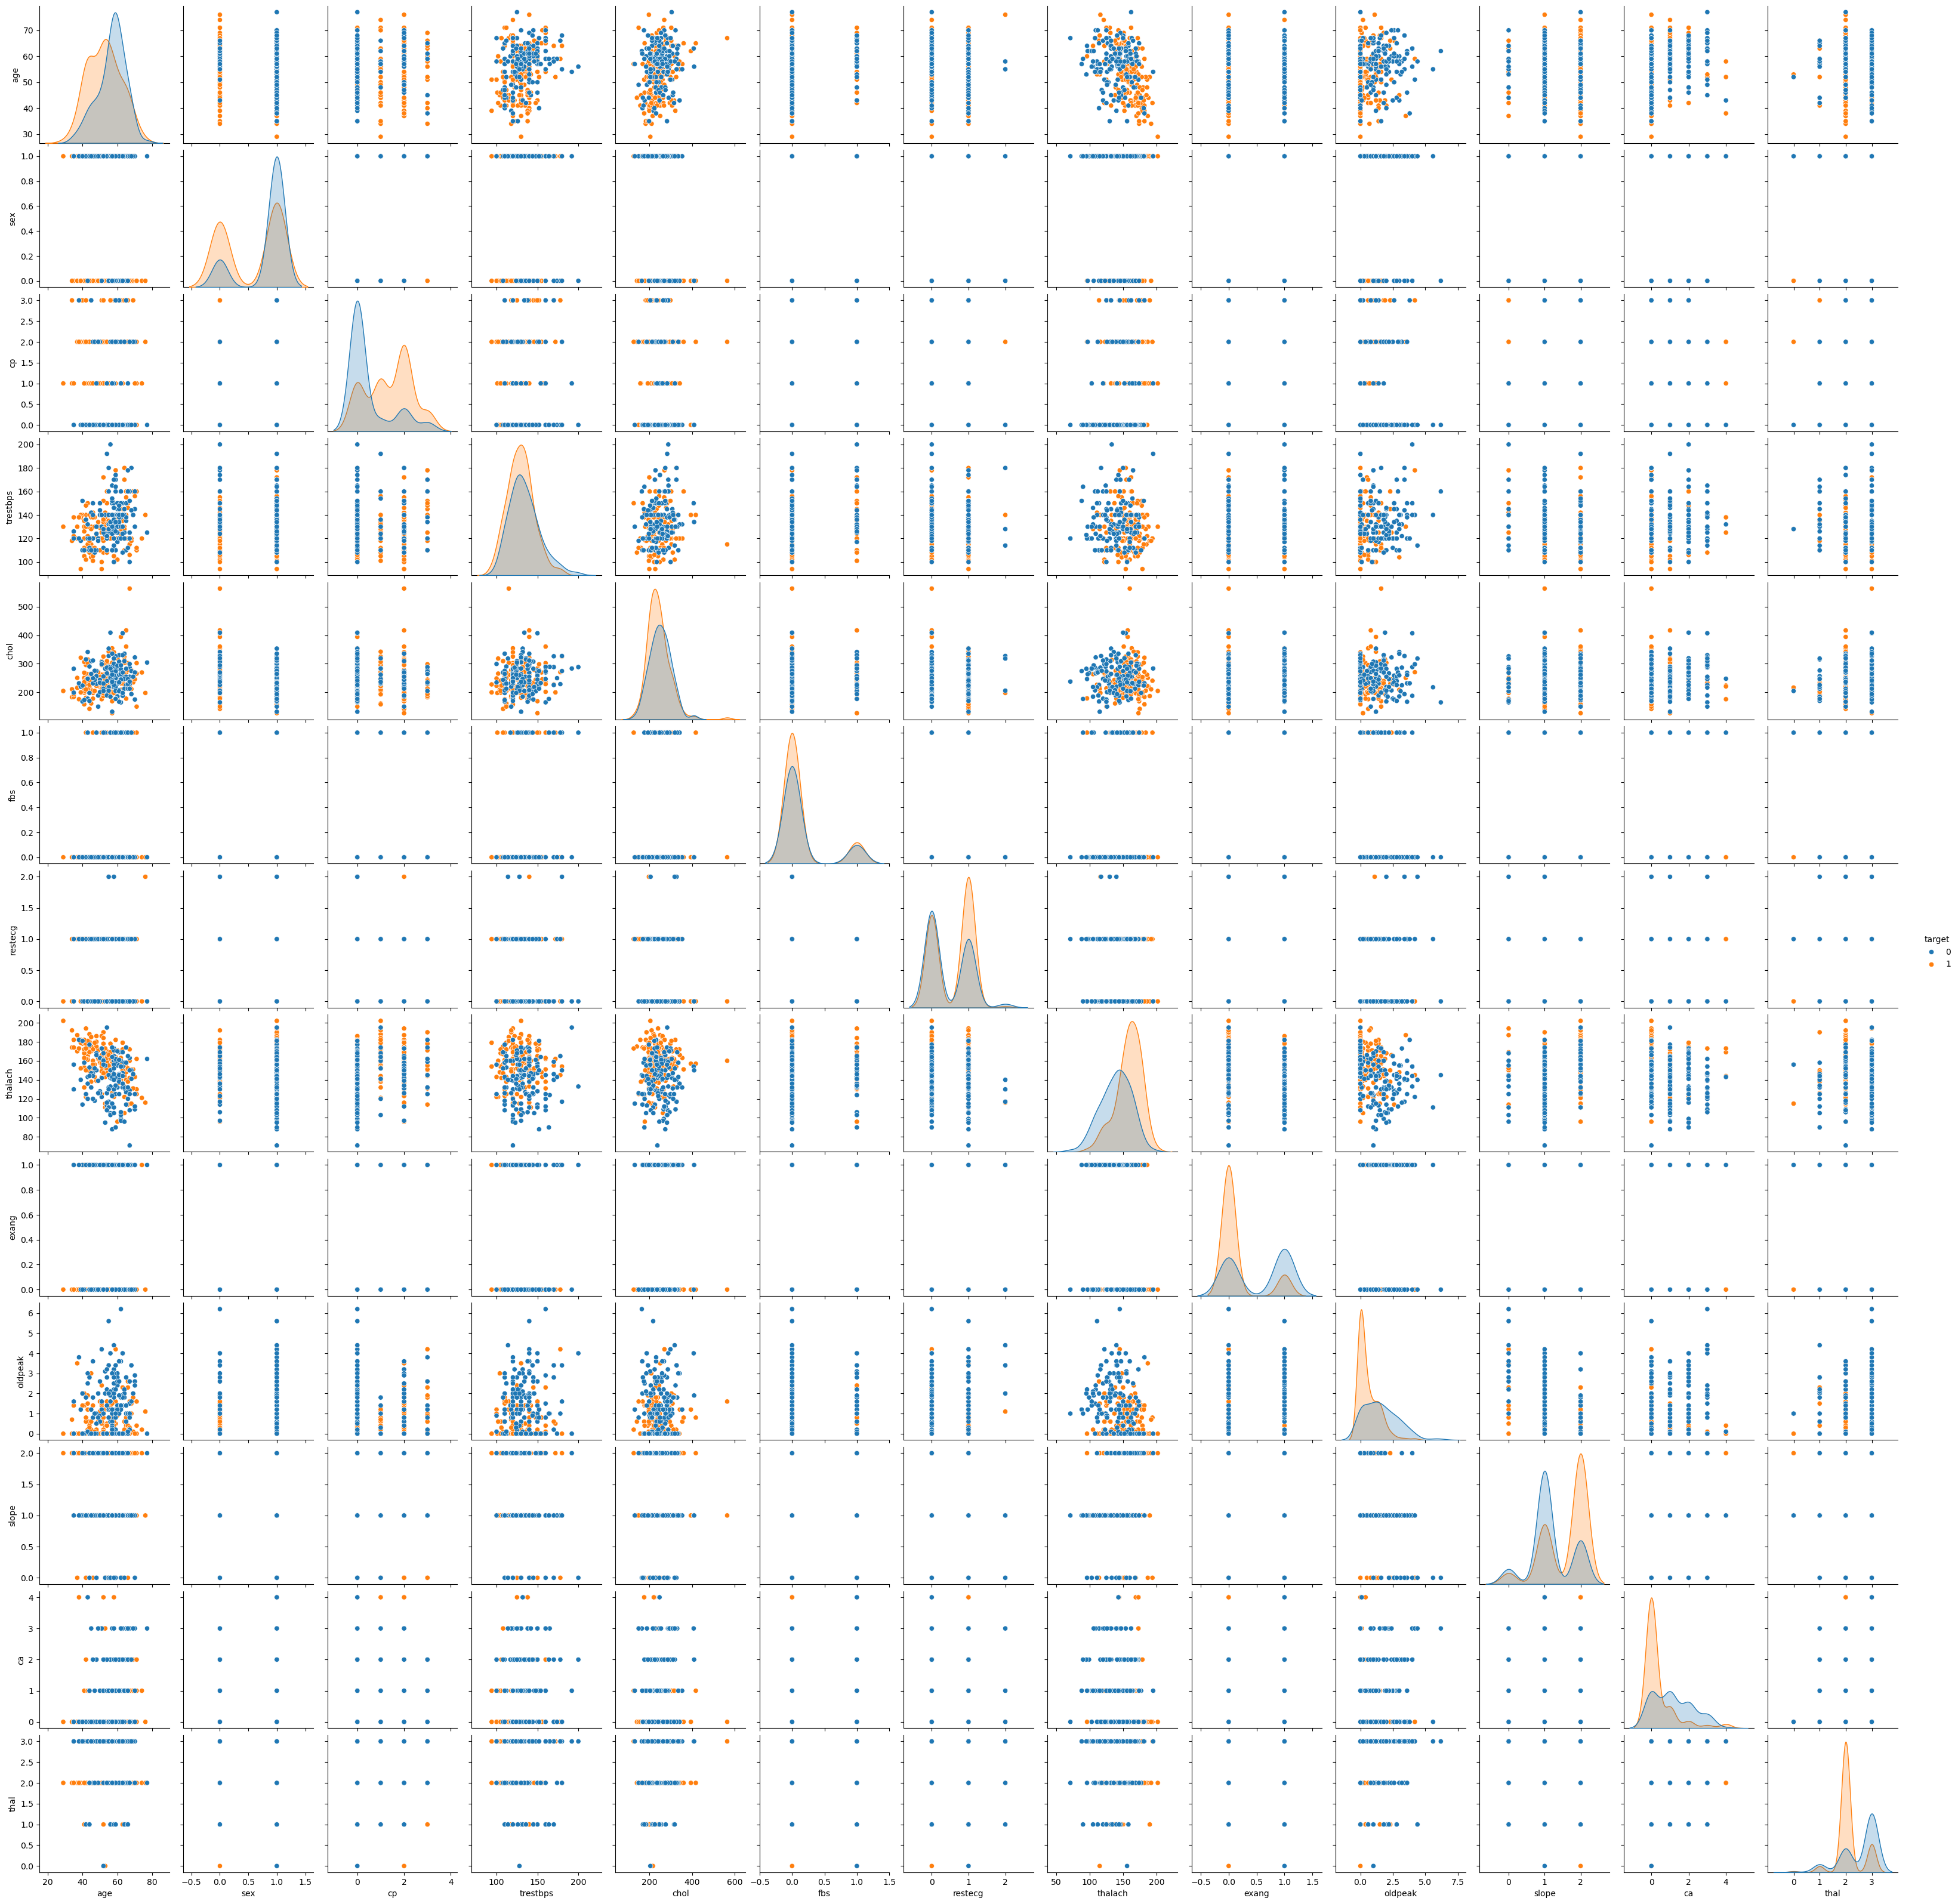

In [ ]:
sns.pairplot(data=df,hue='target')
plt.show()

# step 4:Divide Data intontrain and test
##### Train test split

In [ ]:
#4.1 divide data into target and features
X=df.iloc[:,:-1]
y=df['target']
X.shape,y.shape

((303, 13), (303,))

In [ ]:
# 4.2 Train - test Split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


# step 5 :Multi Model Creation
![image](https://miro.medium.com/v2/resize:fit:1400/1*dqeortojRQDxvA_um2d8uA.png)

In [ ]:
#Because target value: only 0and 1 (binary classification)
#this is not a regression problem


In [ ]:
#step 5.1 Logistic Regression Model

In [ ]:
# It uses the concept of sigmoid func:linear points converted sigmoid(s curve)
#logistic regression:we can solve binary and multiclass classification


In [ ]:
# step 5.1.1 import logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model_lr=LogisticRegression()#model object
model_lr.fit(X_train,y_train)#training/model building:learn pattern in this step

LogisticRegression()

<Axes: xlabel='cp', ylabel='target'>

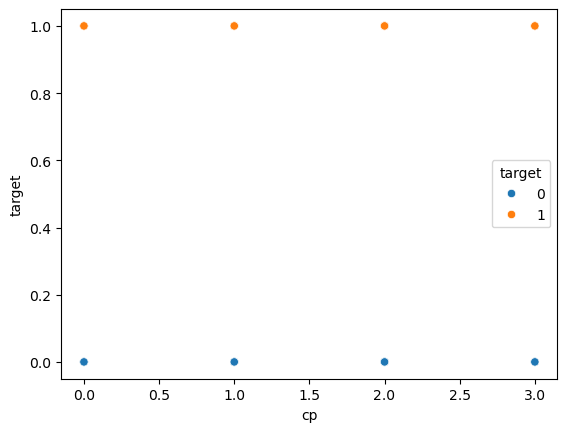

In [ ]:
sns.scatterplot(data=df,x='cp',y='target',hue='target')

In [ ]:
y_pred=model_lr.predict(X_test)
#y_pred

In [ ]:
#5.1.2 import model eva;uation metrices
#it will be called only when problem is of classfication
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report

In [ ]:
#5.1.3import confusion matrix to evaluate classifaction
from sklearn.metrics import confusion_matrix



In [ ]:
#error:comparison:if score tie
#type1,type2:type 1 error danger,


In [ ]:
cm=confusion_matrix(y_test,y_pred)

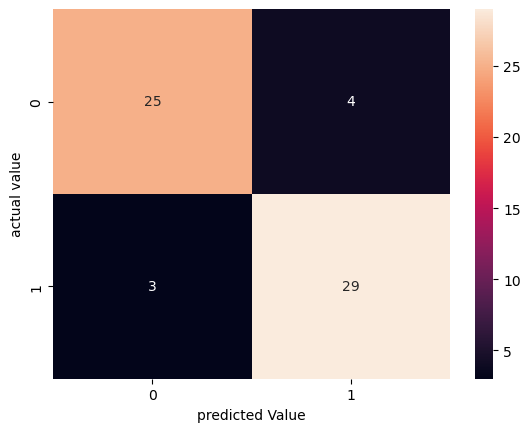

In [ ]:
sns.heatmap(cm,annot=True)
plt.xlabel('predicted Value')
plt.ylabel('actual value')
plt.show()

In [ ]:
cm.ravel()

array([25,  4,  3, 29])

In [ ]:
TN,FP,FN,TP=cm.ravel()

In [ ]:
precision_score(y_test,y_pred)

0.8787878787878788

In [ ]:
ps=TP/(TP+FP)
ps

np.float64(0.8787878787878788)

In [ ]:
acs=(TN+TP)/cm.sum()
acs

np.float64(0.8852459016393442)

In [ ]:
accuracy_score(y_test,y_pred)

0.8852459016393442

In [ ]:
rs=recall_score(y_test,y_pred)
print('recall score',rs)

recall score 0.90625


In [ ]:
#f1 score  to evaluate both precision and recall store

In [ ]:
f1_sc=f1_score(y_test,y_pred)

In [ ]:
print('f1 score',f1_sc)

f1 score 0.8923076923076924


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [ ]:
#5.1.4 checking model score
#model score same as accuracy score
lr_sc=model_lr.score(X_test,y_test)

### step 5.2: Naive Bayes ML model

In [ ]:
#pre assumption:it will pre asume no correlation b/w features

#### step 5.2.2 import naive model


In [ ]:
from sklearn.naive_bayes import GaussianNB
# GaussianNB only be use in case of binary classification
# MultinomialNB: only be use in case of Multi class classification


model_nv = GaussianNB()

model_nv.fit(X_train,y_train)  # Train part/learning


GaussianNB()

In [ ]:
y_pred=model_nv.predict(X_test)

In [ ]:
nv_score=model_nv.score(X_test,y_test)
print('naive byes score',nv_score)


naive byes score 0.8688524590163934


In [ ]:
print('Accuracy score',accuracy_score(y_test,y_pred))
print('precision score',precision_score(y_test,y_pred))
print('recall score',recall_score(y_test,y_pred))
print('f1 score',f1_score(y_test,y_pred))

Accuracy score 0.8688524590163934
precision score 0.9
recall score 0.84375
f1 score 0.8709677419354839


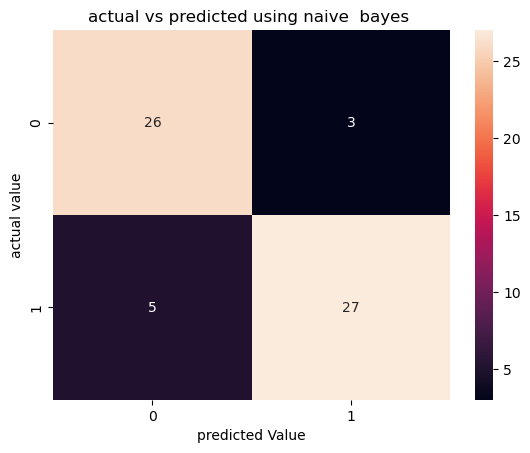

In [ ]:
cm=confusion_matrix(y_test,y_pred)
plt.title('actual vs predicted using naive  bayes ')
sns.heatmap(cm,annot=True)
plt.xlabel('predicted Value')
plt.ylabel('actual value')
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [ ]:
# Model1>Y_pred>Scores>confusionMatrix>classification_report
# Model2>Y_pred>Scores>confusionMatrix>classification_report
# Model3>Y_pred>Scores>confusionMatrix>classification_report
# Model4>Y_pred>Scores>confusionMatrix>classification_report
# Model5>Y_pred>Scores>confusionMatrix>classification_report
# Model6>Y_pred>Scores>confusionMatrix>classification_report
# best Model Save: Error(low), Accuracy Score

# Step 5.3 : support vector machine model

In [ ]:
# SVM Works on Support vectos of nearest data points of different classes
# It will create line, plane or Hyperplane
# we can use this for both regression problems and classification(Binary/Multiclass)

##### step5.3.1 import svm

In [ ]:
from sklearn.svm import SVC
model_svc=SVC()
model_svc.fit(X_train,y_train)

SVC()

In [ ]:
y_pred=model_svc.predict(X_test)


##### step5.3.3 checking scores and confusion matrix

In [ ]:
print('Accuracy score',accuracy_score(y_test,y_pred))
print('precision score',precision_score(y_test,y_pred))
print('recall score',recall_score(y_test,y_pred))
print('f1 score',f1_score(y_test,y_pred))

Accuracy score 0.7049180327868853
precision score 0.6666666666666666
recall score 0.875
f1 score 0.7567567567567568


In [ ]:
cr=classification_report(y_test,y_pred)

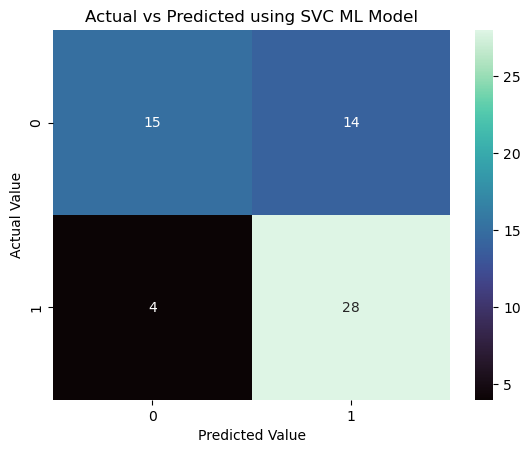

In [ ]:
cm = confusion_matrix(y_test,y_pred)

plt.title('Actual vs Predicted using SVC ML Model')
sns.heatmap(cm,annot = True,cmap='mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [ ]:
svm_score=accuracy_score(y_test,y_pred)

In [ ]:
lr_sc,nv_score,svm_score

(0.8852459016393442, 0.8688524590163934, 0.7049180327868853)

In [ ]:
model_svc.score(X_test,y_test)

0.7049180327868853

## 5.4 Decision Tree ML model

In [ ]:
# sepal width
# sepalm length
# petal width
# petal length

# versicolor
# setosa
# virginica
# decision node= petal width

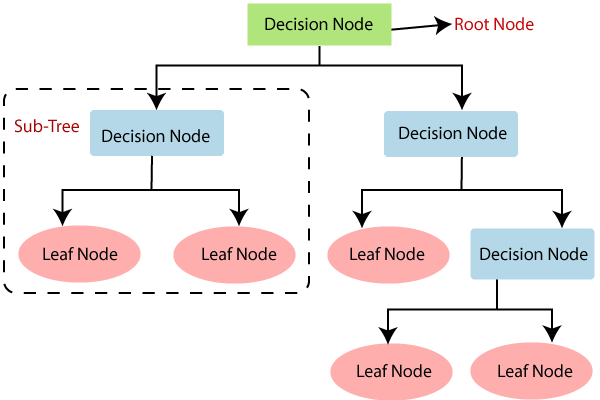

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_dt=DecisionTreeClassifier()
model_dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
#5.4.2 step predict y_pred
y_pred=model_dt.predict(X_test)

In [ ]:
print('Accuracy score',accuracy_score(y_test,y_pred))
print('precision score',precision_score(y_test,y_pred))
print('recall score',recall_score(y_test,y_pred))
print('f1 score',f1_score(y_test,y_pred))

Accuracy score 0.7868852459016393
precision score 0.88
recall score 0.6875
f1 score 0.7719298245614035


In [ ]:
dt_score=accuracy_score(y_test,y_pred)
dt_score

0.7868852459016393

In [ ]:
from sklearn.tree import plot_tree

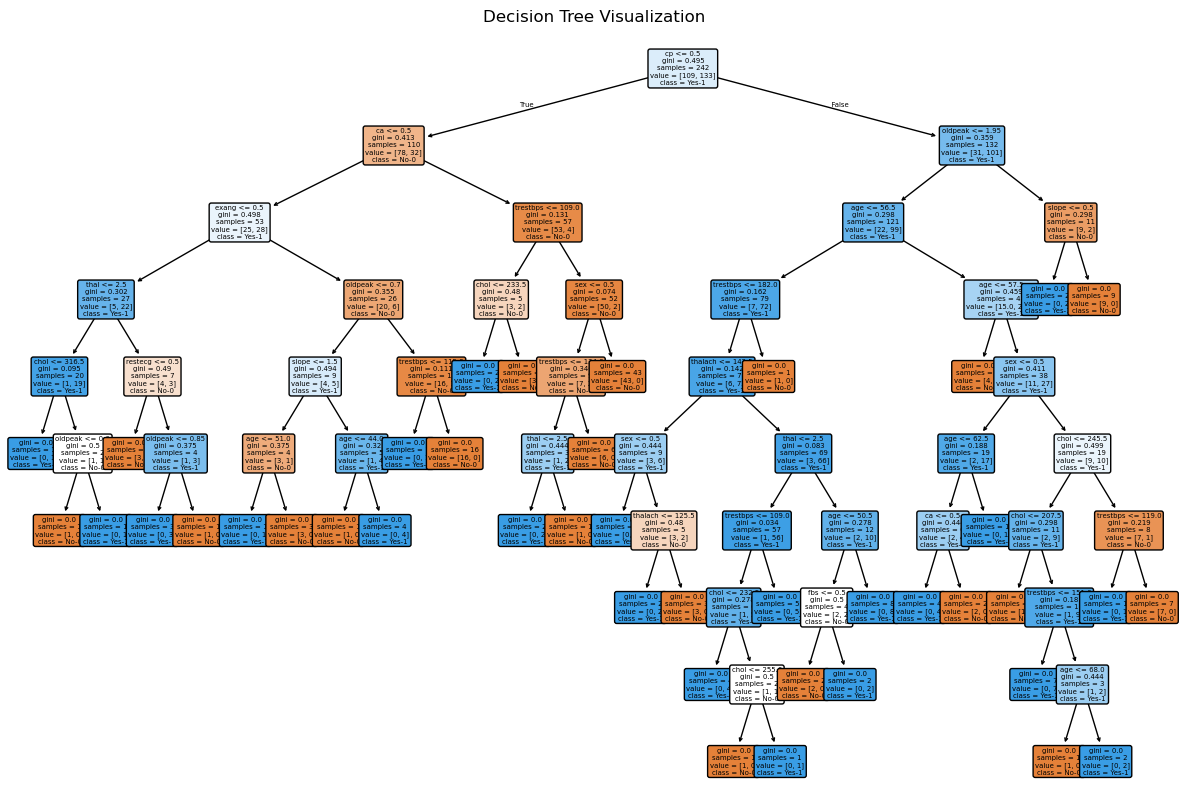

In [ ]:
plt.figure(figsize=(15, 10)) # Adjust figure size for better readability
plot_tree(model_dt,
          feature_names=X.columns,
          class_names=['No-0','Yes-1'],
          filled=True, # Color nodes based on class
          rounded=True, # Round node corners
          fontsize=5) # Adjust font size

plt.title("Decision Tree Visualization")
plt.show() # Display the plot

# step5.5ensemble ml model
- Bagging Techique : bages of multiple ml model and each model give it's prediction/classification,final outcome based on majority
- boosting technique:next modelmlern from previous model and boost it minimize error to improve score

# step 5.5.1 bagging technique model>>random forest ml model

In [ ]:
#random forest:bags of multiple decision trees models
#default trees=100
#bagging

In [ ]:
# Random Forest regression problem: Avg of Final value>> 2.2 + 2.4 + 2.5>> 2.36
# Random Forest Classification>> Binary/Multiclass classification >> Majority Voting

##### step5.5.2import random forest model


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_rf=RandomForestClassifier(n_estimators=200)
model_rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

##### step5.3.3y_pre prediction based onX_test

In [ ]:
y_pred=model_rf.predict(X_test)

In [ ]:
print('Accuracy score',accuracy_score(y_test,y_pred))
print('precision score',precision_score(y_test,y_pred))
print('recall score',recall_score(y_test,y_pred))
print('f1 score',f1_score(y_test,y_pred))

Accuracy score 0.8360655737704918
precision score 0.84375
recall score 0.84375
f1 score 0.84375


In [ ]:
rf_score=accuracy_score(y_test,y_pred)
rf_score

0.8360655737704918

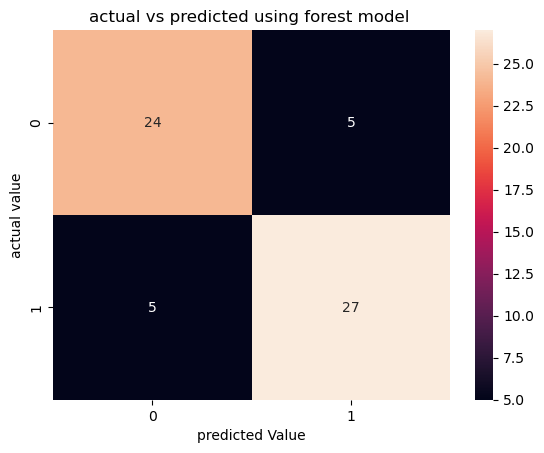

In [ ]:
cm=confusion_matrix(y_test,y_pred)
plt.title('actual vs predicted using forest model ')
sns.heatmap(cm,annot=True)
plt.xlabel('predicted Value')
plt.ylabel('actual value')
plt.show()

### ensemble boosting technique:adaboost,gradientboost,XGbost
- adaboost:adaptive boosting
- gradient boosting:GBM
- LBM Gradientboost:LGBM
- XGboost:Extreme Gradient Boosting:
- catboost:categorical boost

### step5.6.1: importxgboost ml algoriothm

In [ ]:
# pip install xgboost

In [ ]:
import xgboost
print('done')


done


In [ ]:
from xgboost import XGBClassifier
model_xgb=XGBClassifier()
model_xgb.fit(X_train,y_train)#NONE:hyperparameters:model fine tune 


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred=model_xgb.predict(X_test)

In [ ]:
xgb_score = accuracy_score(y_test,y_pred)
xgb_score

0.819672131147541

##### step 5.7 KNN regression and classification

##### 5.7.1 import knn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model_knn=KNeighborsClassifier()
model_knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = model_xgb.predict(X_test)

In [ ]:
knn_score = accuracy_score(y_test,y_pred)
knn_score

0.819672131147541

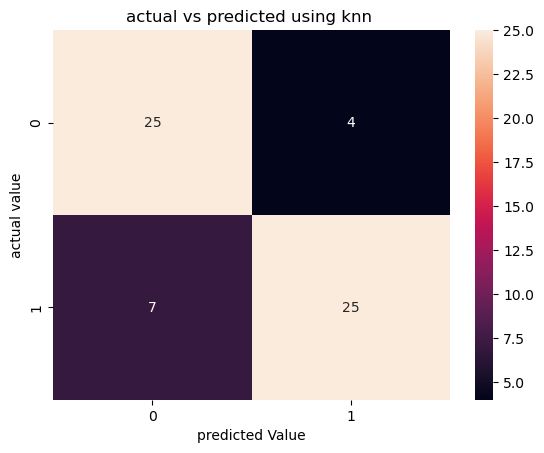

In [ ]:
cm=confusion_matrix(y_test,y_pred)
plt.title('actual vs predicted using knn ')
sns.heatmap(cm,annot=True)
plt.xlabel('predicted Value')
plt.ylabel('actual value')
plt.show()

In [ ]:
#step 5.8: artifical netural

In [ ]:
# ml works only on limited data
# if input changes ml model fail(8 features col:8)
# Deep learning:dense(deep)neural network:turned into multiple possibilities

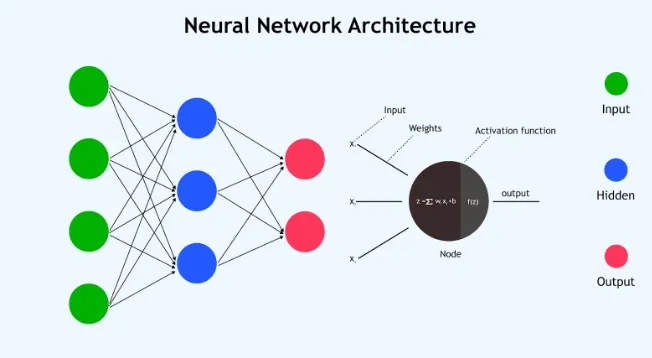
![]( https://editor.analyticsvidhya.com/uploads/94912bosem.png)
![](https://media.licdn.com/dms/image/v2/D4D12AQH2F3GJ9wen_Q/article-cover_image-shrink_720_1280/article-cover_image-shrink_720_1280/0/1688885174323?e=2147483647&v=beta&t=dY_S6xeNsRCIvpIrjrPFzq8qgHPgmP4e_HLaA15ufPM)

In [ ]:
#keras tensor flow:
#tensors:array


# step 5.8.1 ANN model creation

In [ ]:
# pip install keras

In [ ]:
# pip install tensorflow


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
print('done')

In [ ]:
model = Sequential()  # Step 1 Sequential model creation
model.add(Dense(11,activation='relu',input_dim=13)) # Dense Layer
model.add(Dense(1,activation='sigmoid')) # Output will be 1 Neuron for Binary

model.compile(loss='binary_crossentropy',  # loss to calculate model loss
              optimizer='adam', #optimizer to optimize model learning
              metrics=['accuracy'])  #  metrics return accuracy score

print('Done')

In [ ]:
#5.8.3 model training
model.fit(X_train,y_train,epochs=300)

In [ ]:
y_pred=model.predict(X_test)
y_pred=[round(i[0]) for i in y_pred]
print(y_pred)

In [ ]:
ann_score=accuracy_score(y_test,y_pred)
ann_score

In [ ]:
all_model_score=[lr_sc,nv_score,svm_score,dt_score,rf_score,xgb_score,knn_score,ann_score]
model_name=['Logistic','Naive','svm','Decision Tree','Random Forest','XGB','knn','ann']
print('done')

In [ ]:
plt.figure(figsize=(12,5))
plt.title('All Model Score Comparison')
ax = plt.bar(x = model_name, height= all_model_score,color = sns.color_palette('mako',8))
plt.bar_label(ax)
plt.xlabel('Model Name')
plt.ylabel('Score')
plt.xticks(rotation = 45)
plt.show()

# step 7 best model save

In [ ]:
import pickle
with open('heart_disease_pred.pkl','wb') as f:
    pickle.dump(model_lr,f)
print('Done')

In [ ]:
https://itdesigners.org/wp-content/uploads/2024/02/heart-1024x576.jpg

In [ ]:
https://upload.wikimedia.org/wikipedia/ps/1/13/HeartBeat.gif

In [ ]:
import streamlit


In [ ]:
!streamlit run heart_disease.py